In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
class GradientDescent:
    def __init__(self, learning_rate=0.01, epochs=10 ** 6, epsilon=1e-6):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.epsilon = epsilon
        self.weights = 0
        self.bias = 0

    def fit(self, X, y):
        previous_error = float('inf')
        n_samples = len(X)

        for epoch in range(self.epochs):
            y_pred = self.weights * X + self.bias
            error = y_pred - y
            mse = np.mean(error * 2)
            if abs(previous_error - mse) < self.epsilon:
                print(f'Достигнута необходимая точность на {epoch + 1} эпохе')
                break
            
            previous_error = mse
            gradient = (2 / n_samples) * (X.T @ error)
            bias_gradient = (2 / n_samples) * np.sum(error)
            
            self.weights -= self.learning_rate * gradient
            self.bias -= self.learning_rate * bias_gradient 
        else:
            print('Желаемая точность не достигнута')

    def get_weights(self):
        return self.weights, self.bias

    def predict(self, X):
        return X * self.weights + self.bias
    

In [21]:
def f(x):
    return 3.5 * x + 4.28

In [22]:
X = np.arange(1, 11, 1)
y = f(X).flatten()

In [23]:
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [24]:
y

array([ 7.78, 11.28, 14.78, 18.28, 21.78, 25.28, 28.78, 32.28, 35.78,
       39.28])

In [25]:
model = GradientDescent()
model.fit(X, y)

Достигнута необходимая точность на 2090 эпохе


In [26]:
out = model.get_weights()

In [27]:
out

(3.5000808288953755, 4.279437283588111)

In [28]:
y_pred = model.predict(X)

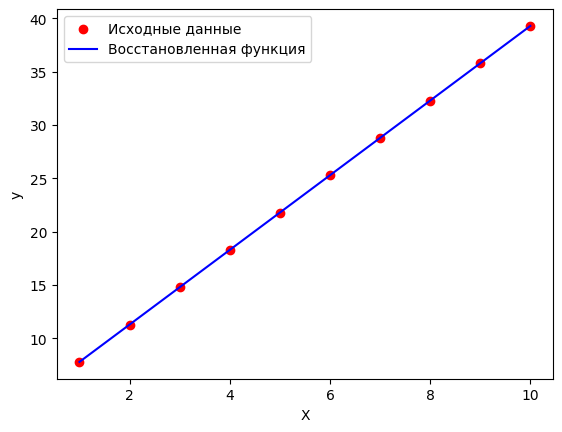

In [29]:
plt.scatter(X, y, color='red', label='Исходные данные')
plt.plot(X, y_pred, color='blue', label='Восстановленная функция')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()